
# Stackoverflow Survey

Each year, Stackoverflow conducts a developer survey designed to ask the developer community about everything from their favorite technologies to their job preferences. 2018 marks the eighth year they published the Annual Developer Survey results—with the largest number of respondents yet. Over 100,000 developers took the 30-minute survey this past January.

The survey was fielded from January 8 to January 28, 2018. The median time spent on the survey for qualified responses was 25.8 minutes, and the median time for those who finished the entire survey was 29.4 minutes.

Respondents were recruited primarily through channels owned by Stack Overflow. The top 5 sources of respondents were banner ads, email lists, house ad, blog posts, and Twitter. Since respondents were recruited in this way, highly engaged users on Stack Overflow were more likely to notice the links for the survey and click to begin it. Respondents who finished the survey were awarded a "Census" badge as a motivation to complete the survey.

2018 covered a few new topics ranging from artificial intelligence to ethics in coding. Here are a few of the top takeaways from the [2018 official results]:

The [2019 official results] are now available. I will update the notebook when the 2019 data becomes available.


- DevOps and machine learning are important trends in the software industry today. Languages and frameworks associated with these kinds of works are on the rise, and developers working in these areas command the highest salaries.
- Only tiny fractions of developers say that they would write unethical code or that they have no obligation to consider the ethical implications of code, but beyond that, respondents see a lot of ethical gray. Developers are not sure how they would report ethical problems, and have differing ideas about who ultimately is responsible for unethical code.
- Developers are overall optimistic about the possibilities that artificial intelligence offers, but are not in agreement about what the dangers of AI are.
-  Python has risen in the ranks of programming languages on our survey, surpassing C# in popularity this year, much like it surpassed PHP last year.
- When assessing a prospective job, different kinds of developers apply different sets of priorities. Women say their highest priorities are company culture and opportunities for professional development, while men say their highest priorities are compensation and working with specific technologies.

[2018 official results]:(https://insights.stackoverflow.com/survey/2018)
[2019 official results]:(https://insights.stackoverflow.com/survey/2019)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from collections import defaultdict
%matplotlib inline

sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
survey = "Data\\2018_survey_results_public.csv"
surveyData = pd.read_csv(survey)
surveyData['Salary'] = pd.to_numeric(surveyData['Salary'],errors='coerce')
surveyData['DevType'].fillna('None',inplace=True)

Lets add some additional data to map the countries to regions, as we know the stack overflow commmunity is spread across the world.

In [3]:
countries = "Data\country mapping.csv"

countryData = pd.read_csv(countries,encoding = "ISO-8859-1")

In [4]:
df = surveyData.merge(countryData, left_on='Country', right_on='Country')
df.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy,Region,Hemisphere
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy,Africa,Global South
1,1649,Yes,Yes,Kenya,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Fewer than 10 employees,Back-end developer;DevOps specialist;System ad...,...,Straight or heterosexual,"Secondary school (e.g. American high school, G...",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy,Africa,Global South
2,3037,Yes,Yes,Kenya,No,Employed full-time,Associate degree,Web development or web design,Fewer than 10 employees,Full-stack developer,...,Straight or heterosexual,Associate degree,Black or of African descent,18 - 24 years old,No,NaN,The survey was an appropriate length,Neither easy nor difficult,Africa,Global South
3,3135,Yes,Yes,Kenya,No,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,Back-end developer;DevOps specialist;Full-stac...,...,Straight or heterosexual,Some college/university study without earning ...,Black or of African descent,25 - 34 years old,No,NaN,The survey was too long,Neither easy nor difficult,Africa,Global South
4,3864,Yes,Yes,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Fewer than 10 employees,Back-end developer;Data scientist or machine l...,...,Straight or heterosexual,"Secondary school (e.g. American high school, G...",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Neither easy nor difficult,Africa,Global South


# Australia

Lets look more local, and extract just the Australian's

## How are Australian's employed

In [5]:
Australia = df[df['Country'] == 'Australia'].reset_index()
total_Australians = Australia.shape[0]

print ('There were {} Australian respondents in the survey, which is {}% of the total population.'.
       format(total_Australians,round(total_Australians/df.shape[0]*100,2)))


There were 2018 Australian respondents in the survey, which is 2.09% of the total population.


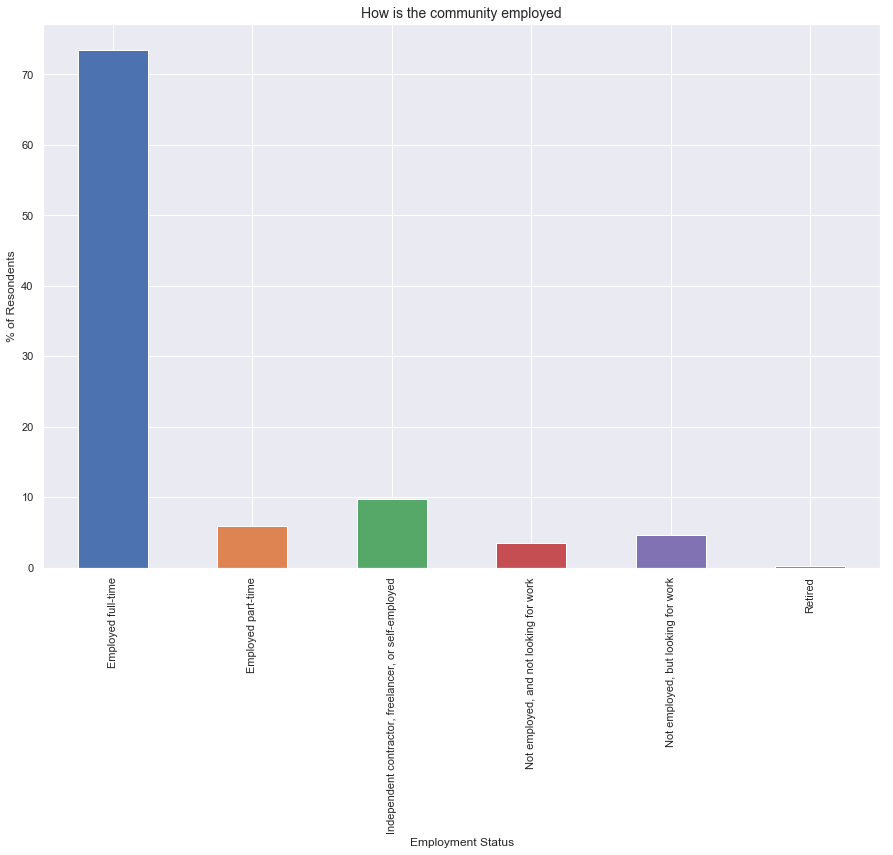

In [6]:

(Australia['Employment'].value_counts()/total_Australians*100).sort_index().plot.bar(figsize=(15, 10), align='center')
plt.xlabel('Employment Status')
plt.ylabel('% of Resondents')
plt.title('How is the community employed', fontsize=14)
plt.show()

In [7]:
Australia.drop(['index'],axis=1,inplace=True)

## What developer roles do Australians do?

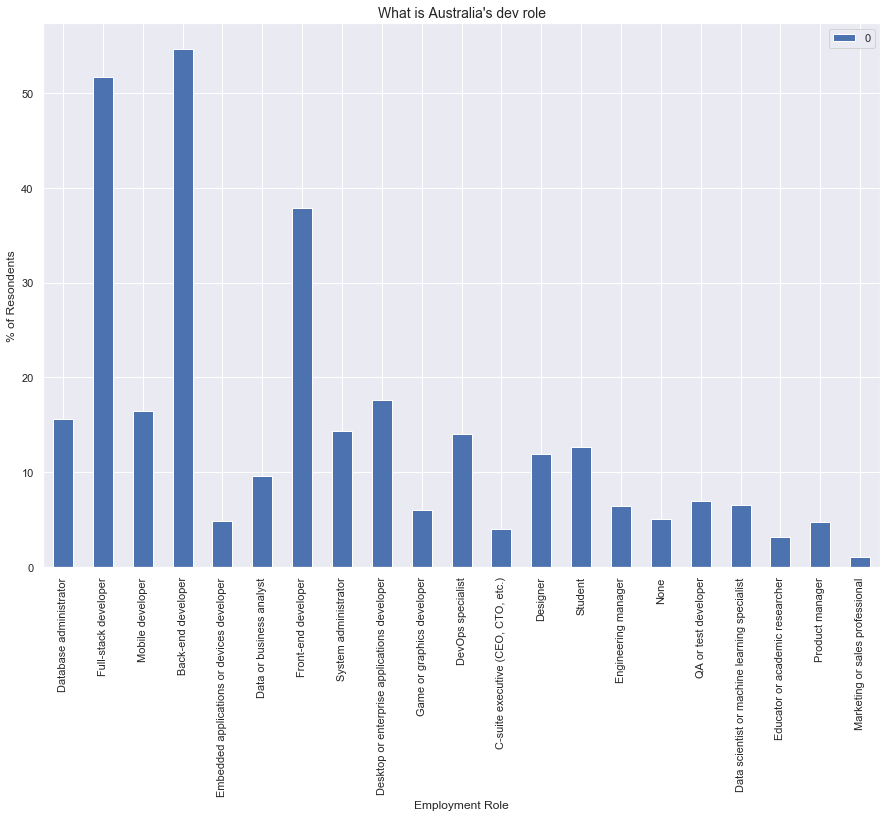

In [8]:
# Get list of lists of Type of Developers

devtype = [v.split(';') for v in Australia['DevType'].values]

# Convert all lists to a single list
devList = []

for d in devtype:
    for e in d:
        devList.append(e)

# Create a dictionary of number of listitem
b = {}
for item in devList:
    b[item] = b.get(item, 0) + 1

# Create a dataframe from dictionary
df_roles = pd.DataFrame(b, index=[0]).T

(df_roles/total_Australians*100).plot.bar(figsize=(15, 10), align='center')
plt.xlabel('Employment Role')
plt.ylabel('% of Resondents')
plt.title("What is Australia's dev role", fontsize=14)
plt.show();

## How many Australian are employed in data roles?

In [23]:
Australia['SalaryType'][Australia['SalaryType'].isnull() == True] = 'Yearly'

Australia['yearlySalary'] = Australia['Salary']
Australia['yearlySalary'][Australia['SalaryType'] == 'Monthly'] = Australia['Salary']*12
Australia['yearlySalary'][Australia['SalaryType'] == 'Weekly'] = Australia['Salary']*52



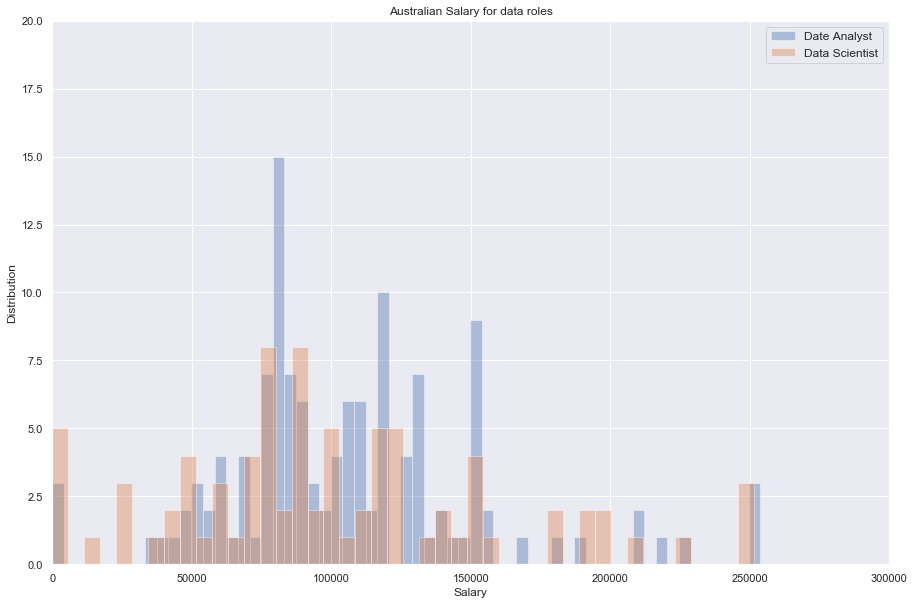

In [35]:
fig, ax = plt.subplots(figsize=(15, 10))

mask = Australia['DevType'].str.contains("Data or business analyst")
Data_Analyst = Australia[mask]
sns.distplot(Data_Analyst['yearlySalary'], bins=1000, kde=False, label='Date Analyst')

mask = Australia['DevType'].str.contains("Data scientist or machine learning specialist")
Data_Scientist = Australia[mask]
sns.distplot(Data_Scientist['yearlySalary'], bins=1000, kde=False,label='Data Scientist')

plt.legend(prop={'size': 12})
plt.title('Australian Salary for data roles')
plt.xlabel('Salary')
plt.ylabel('Distribution')
plt.xlim(0,300000);
plt.ylim(0,20);
plt.show()

In [25]:
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean, sem = np.mean(data), scipy.stats.sem(data)
    interval = sem * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return mean, interval

In [36]:
# Ignore the obscene salaries greater than $300,000 and the ones less than $10,000 as
# these are liklely monthly salaries that werent labelled correctly or typos
Data_Analyst = Data_Analyst[(Data_Analyst['yearlySalary'] > 10000) & 
                            (Data_Analyst['yearlySalary'] < 300000)]
Data_Scientist = Data_Scientist[(Data_Scientist['yearlySalary'] > 10000) & 
                                (Data_Scientist['yearlySalary'] < 300000)]



DA_salary, DA_interval = mean_confidence_interval(Data_Analyst['yearlySalary'])
DS_salary, DS_interval = mean_confidence_interval(Data_Scientist['yearlySalary'])

print ("Average Data Analyst Salary: ${} ± ${}".format(round(DA_salary,2), round(DA_interval,2)))
print ("Average Data Scientist Salary: ${} ± ${}".format(round(DS_salary,2), round(DS_interval,2)))

Average Data Analyst Salary: $108288.71 ± $7716.25
Average Data Scientist Salary: $107431.78 ± $12188.72


## How many people are looking for work?

In [27]:
employment = Australia.groupby(by='Employment')['Respondent'].count()/total_Australians*100

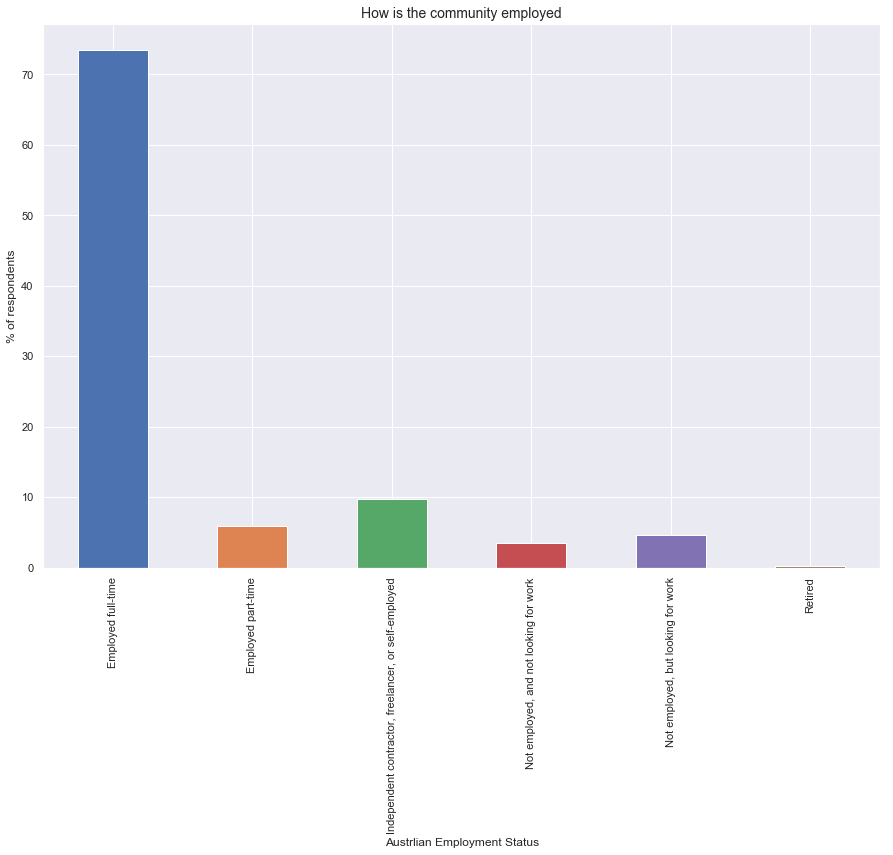

In [28]:
employment.plot.bar(figsize=(15, 10), align='center')
plt.xlabel('Austrlian Employment Status')
plt.ylabel('% of respondents')
plt.title('How is the community employed', fontsize=14)
plt.show()

In [29]:
round(employment,2)

Employment
Employed full-time                                      73.49
Employed part-time                                       5.85
Independent contractor, freelancer, or self-employed     9.81
Not employed, and not looking for work                   3.52
Not employed, but looking for work                       4.66
Retired                                                  0.30
Name: Respondent, dtype: float64

As of 2018 Stackover flow survey, only 4.6% of respondands where looking for work.

# Global
Some more interesting questions about the global community follow:

## How many people code for fun?

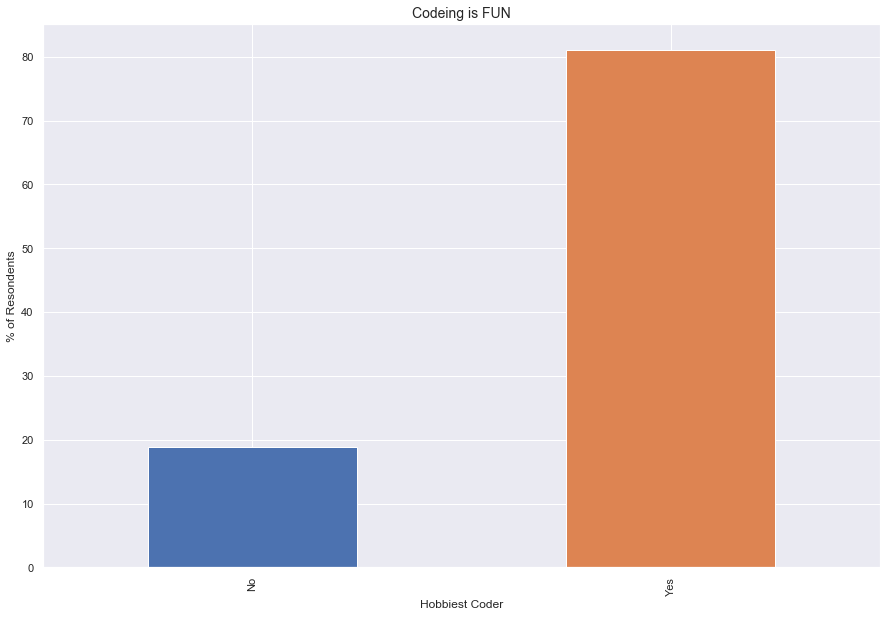

In [30]:
# How many people code for fun
total_respondents = df.shape[0]
(df['Hobby'].value_counts()/total_respondents*100).sort_index().plot.bar(figsize=(15, 10), align='center')
plt.xlabel('Hobbiest Coder')
plt.ylabel('% of Resondents')
plt.title('Codeing is FUN', fontsize=14)
plt.show()

## How many people give back to the community through open source projects?

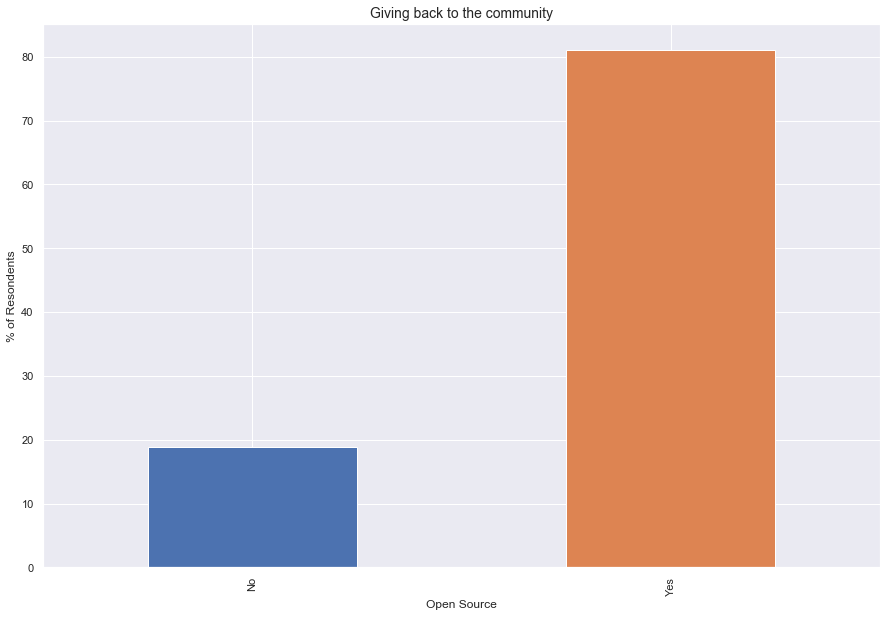

In [31]:
# How many contribute to open source
(df['Hobby'].value_counts()/total_respondents*100).sort_index().plot.bar(figsize=(15, 10), align='center')
plt.xlabel('Open Source')
plt.ylabel('% of Resondents')
plt.title('Giving back to the community', fontsize=14)
plt.show()

## Where is the Stackoverflow community situated?

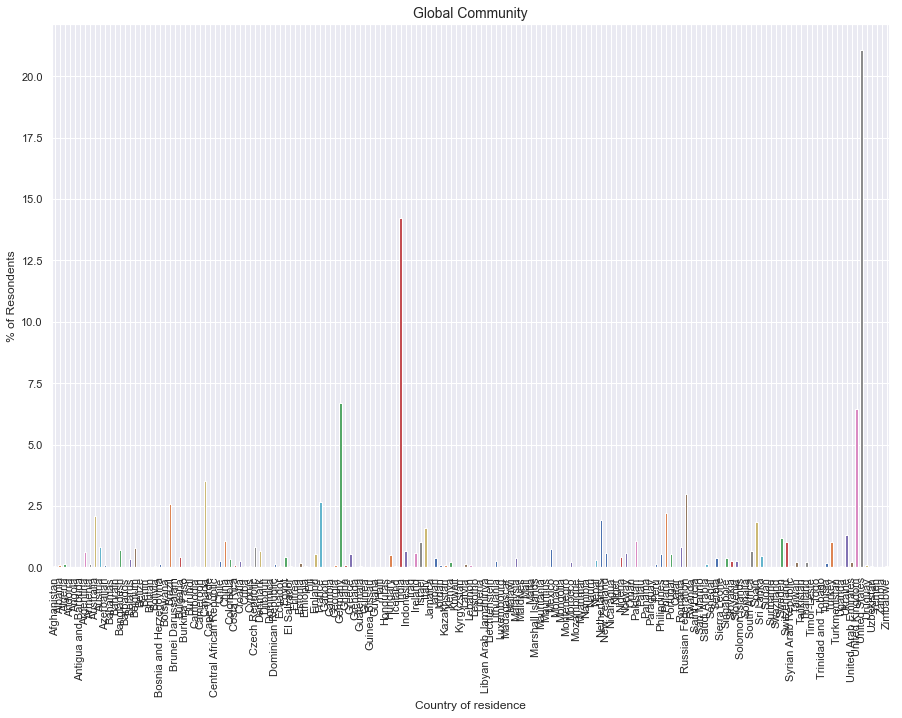

In [32]:
# Where does everyone come from
(df['Country'].value_counts().sort_index()/total_respondents*100).plot.bar(figsize=(15, 10), align='center')
plt.xlabel('Country of residence')
plt.ylabel('% of Resondents')
plt.title('Global Community', fontsize=14)
plt.show()

That's a bit hard to see any value, so lets aggregate this to the regions/continent.

## What Continent is the Stackoverflow community living in?


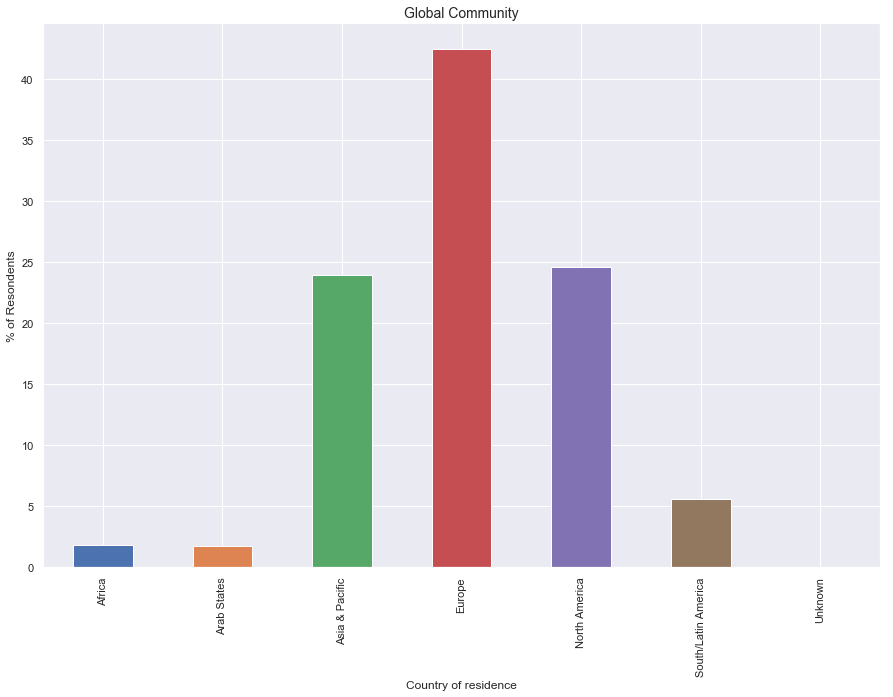

In [33]:
# Aggregating the countries to regions
(df['Region'].value_counts().sort_index()/total_respondents*100).plot.bar(figsize=(15, 10), align='center')
plt.xlabel('Country of residence')
plt.ylabel('% of Resondents')
plt.title('Global Community', fontsize=14)
plt.show()

## How many people are studying?

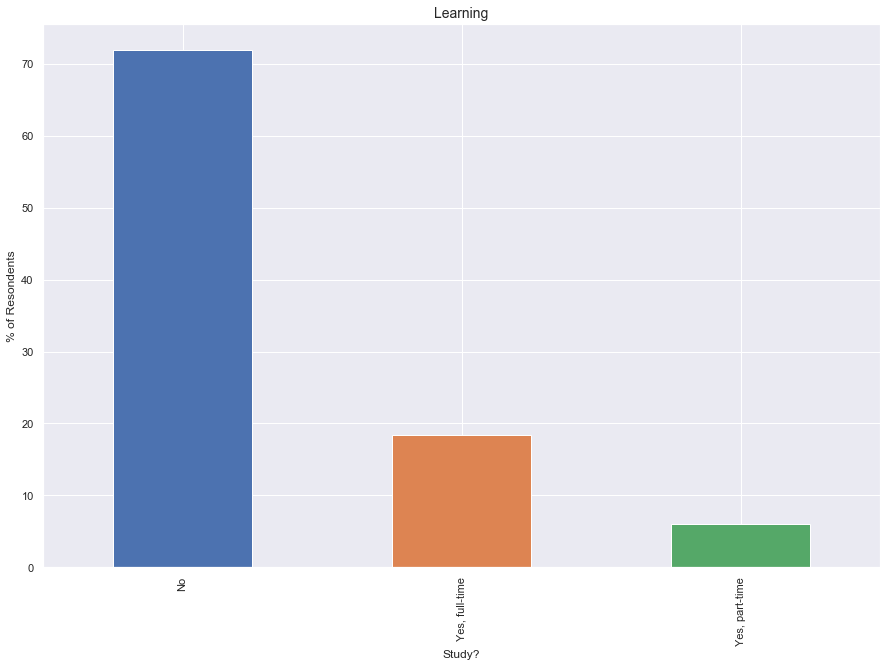

In [34]:
# How many are studying
(df['Student'].value_counts().sort_index()/total_respondents*100).plot.bar(figsize=(15, 10), align='center')
plt.xlabel('Study?')
plt.ylabel('% of Resondents')
plt.title('Learning', fontsize=14)
plt.show()

## How is the stackoverflow employed?

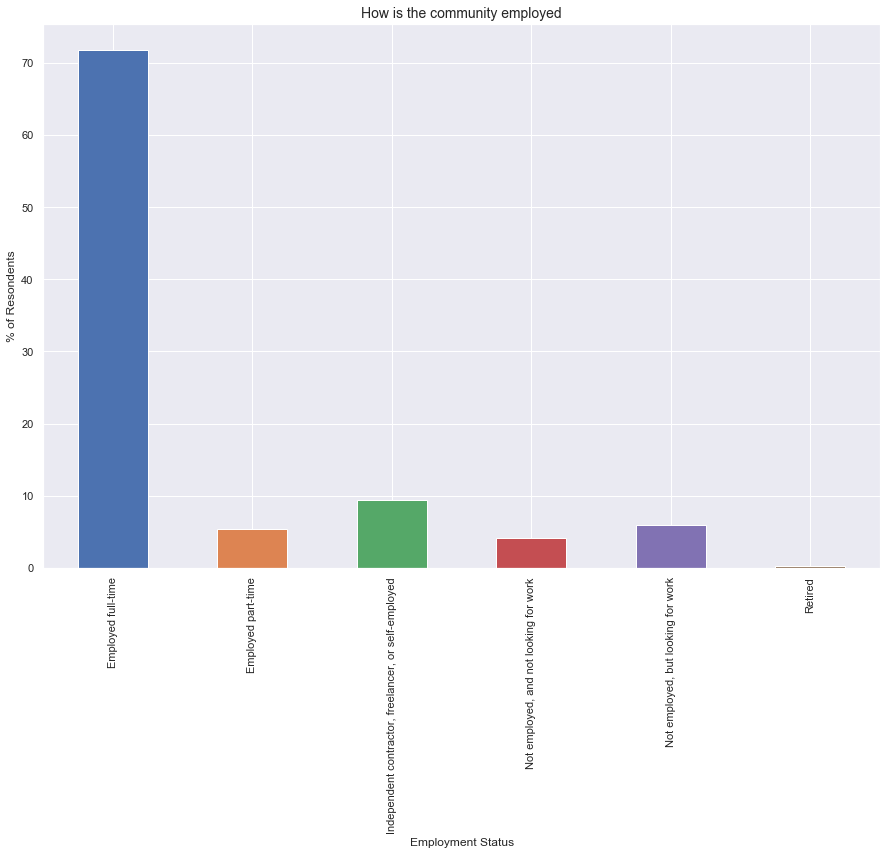

In [22]:
# How is everyone employed
(df['Employment'].value_counts()/total_respondents*100).sort_index().plot.bar(figsize=(15, 10), align='center')
plt.xlabel('Employment Status')
plt.ylabel('% of Resondents')
plt.title('How is the community employed', fontsize=14)
plt.show()